In [46]:
import pandas as pd
import mysql.connector
file_path = r'C:\Users\saivi\Desktop\poj\HINDALCO_1D.xlsx'
excel_data = pd.read_excel(file_path)
coe = mysql.connector.connect(
    host="localhost",
    user="root",
    password="561208100", 
    database="final"  
)
cur = coe.cursor()
insert_query = """
INSERT INTO tab (instrument, datetime, open, high, low, close, volume)
VALUES (%s, %s, %s, %s, %s, %s, %s)
"""
for index, row in excel_data.iterrows():
    cur.execute(insert_query, (
        row['instrument'], 
        row['datetime'], 
        row['open'], 
        row['high'], 
        row['low'], 
        row['close'], 
        row['volume']
    ))

coe.commit()
cur.close()
coe.close()


C:\Users\saivi\AppData\Local\Temp\ipykernel_9636\1355064223.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'][50:] = np.where(df['SMA_50'][50:] > df['SMA_200'][50:], 1, -1)  # 1 for buy, -1 for sell
C:\Users\saivi\AppData\Loc

Buy Signals:
 Empty DataFrame
Columns: [datetime, close]
Index: []

Sell Signals:
      datetime   close
50 2014-04-07  137.35


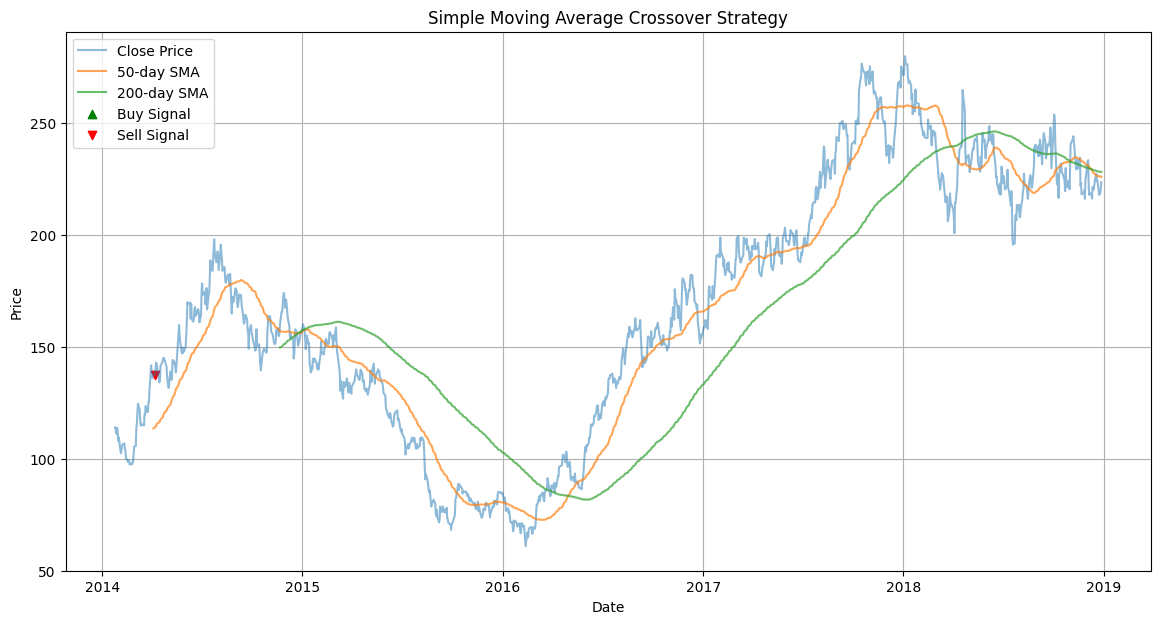

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = r'C:\Users\saivi\Desktop\poj\HINDALCO_1D.xlsx'
df = pd.read_excel(file_path)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by='datetime')
df['SMA_50'] = df['close'].rolling(window=50).mean()
df['SMA_200'] = df['close'].rolling(window=200).mean()
df['Signal'] = 0 
df['Signal'][50:] = np.where(df['SMA_50'][50:] > df['SMA_200'][50:], 1, -1) 
df['Position'] = df['Signal'].diff()
buy_signals = df[df['Position'] == 1][['datetime', 'close']]
sell_signals = df[df['Position'] == -1][['datetime', 'close']]
print("Buy Signals:\n", buy_signals)
print("\nSell Signals:\n", sell_signals)
plt.figure(figsize=(14,7))
plt.plot(df['datetime'], df['close'], label='Close Price', alpha=0.5)
plt.plot(df['datetime'], df['SMA_50'], label='50-day SMA', alpha=0.7)
plt.plot(df['datetime'], df['SMA_200'], label='200-day SMA', alpha=0.7)
plt.scatter(buy_signals['datetime'], buy_signals['close'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals['datetime'], sell_signals['close'], marker='v', color='red', label='Sell Signal', alpha=1)
plt.title('Simple Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()


In [45]:
import unittest
from datetime import datetime
import pandas as pd

class TestDataValidation(unittest.TestCase):

    def setUp(self):
        """Set up mock data similar to the Excel structure for testing."""
        
        self.data = pd.DataFrame({
            'instrument': ['HINDALCO', 'TATASTEEL'],
            'datetime': [datetime(2023, 10, 10, 9, 15), datetime(2023, 10, 11, 9, 15)],
            'open': [200.5, 195.6],
            'high': [210.0, 202.5],
            'low': [198.5, 190.0],
            'close': [208.0, 200.0],
            'volume': [100000, 150000]
        })

    def testi(self):
        """Test if the 'instrument' column contains only strings."""
        for instrument in self.data['instrument']:
            self.assertIsInstance(instrument, str, f"Instrument '{instrument}' is not a string")

    def testd(self):
        """Test if the 'datetime' column contains valid datetime objects."""
        for dt in self.data['datetime']:
            self.assertIsInstance(dt, datetime, f"Datetime '{dt}' is not a valid datetime object")

    def testo(self):
        """Test if 'open', 'high', 'low', 'close' are decimals (or floats in Python)."""
        columns = ['open', 'high', 'low', 'close']
        for col in columns:
            for value in self.data[col]:
                self.assertIsInstance(value, (float, int), f"Value '{value}' in column '{col}' is not a valid decimal")

    def testv(self):
        """Test if the 'volume' column contains only integers."""
        for volume in self.data['volume']:
            self.assertIsInstance(volume, int, f"Volume '{volume}' is not an integer")


if __name__ == '__main__':
    unittest.main()


E
ERROR: C:\Users\saivi\AppData\Roaming\jupyter\runtime\kernel-3d232cb3-2c1e-4763-be61-6bdd4891ec6c (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\saivi\AppData\Roaming\jupyter\runtime\kernel-3d232cb3-2c1e-4763-be61-6bdd4891ec6c'

----------------------------------------------------------------------
Ran 1 test in 0.010s

FAILED (errors=1)


SystemExit: True

C:\Users\saivi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
#integrated all the above functions in a singe code
import pandas as pd
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import unittest

db_config = {
    'host': "localhost",
    'user': "root",
    'password': "561208100",
    'database': "final"
}

file_path = r'C:\Users\saivi\Desktop\poj\HINDALCO_1D.xlsx'

def is_valid_row(row):
    """Check if the row data is valid."""
    if not isinstance(row['instrument'], str):
        return False
    if not isinstance(row['datetime'], datetime):
        return False
    if not all(isinstance(row[col], (float, int)) for col in ['open', 'high', 'low', 'close']):
        return False
    if not isinstance(row['volume'], int):
        return False
    return True

def insert(file_path, db_config):
    excel_data = pd.read_excel(file_path)
    coe = mysql.connector.connect(
        host=db_config['host'],
        user=db_config['user'],
        password=db_config['password'],
        database=db_config['database']
    )
    cur = coe.cursor()
    insert_query = """
    INSERT INTO tab (instrument, datetime, open, high, low, close, volume)
    VALUES (%s, %s, %s, %s, %s, %s, %s)
    """
    
    for index, row in excel_data.iterrows():
        if is_valid_row(row):  
            data_tuple = (
                row['instrument'], 
                row['datetime'], 
                row['open'], 
                row['high'], 
                row['low'], 
                row['close'], 
                row['volume']
            )
            cur.execute(insert_query, data_tuple)
            print(f"Inserted: {data_tuple}")
        else:
            print(f"Skipped invalid data at index {index}: {row}")
    
    coe.commit()
    cur.close()
    coe.close()
    print("Data insertion completed!")

def sma(file_path):
    df = pd.read_excel(file_path)
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df.sort_values(by='datetime')
    df['SMA_50'] = df['close'].rolling(window=50).mean()
    df['SMA_200'] = df['close'].rolling(window=200).mean()
    df['Signal'] = 0 
    df['Signal'][50:] = np.where(df['SMA_50'][50:] > df['SMA_200'][50:], 1, -1)
    df['Position'] = df['Signal'].diff()
    buy_signals = df[df['Position'] == 1][['datetime', 'close']]
    sell_signals = df[df['Position'] == -1][['datetime', 'close']]
    print("Buy Signals:\n", buy_signals)
    print("\nSell Signals:\n", sell_signals)
    
    plt.figure(figsize=(14,7))
    plt.plot(df['datetime'], df['close'], label='Close Price', alpha=0.5)
    plt.plot(df['datetime'], df['SMA_50'], label='50-day SMA', alpha=0.7)
    plt.plot(df['datetime'], df['SMA_200'], label='200-day SMA', alpha=0.7)
    plt.scatter(buy_signals['datetime'], buy_signals['close'], marker='^', color='green', label='Buy Signal', alpha=1)
    plt.scatter(sell_signals['datetime'], sell_signals['close'], marker='v', color='red', label='Sell Signal', alpha=1)
    plt.title('Simple Moving Average Crossover Strategy')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

class Testvalidation(unittest.TestCase):
    def setUp(self):
        self.data = pd.DataFrame({
            'instrument': ['HINDALCO', 'TATASTEEL'],
            'datetime': [datetime(2023, 10, 10, 9, 15), datetime(2023, 10, 11, 9, 15)],
            'open': [200.5, 195.6],
            'high': [210.0, 202.5],
            'low': [198.5, 190.0],
            'close': [208.0, 200.0],
            'volume': [100000, 150000]
        })

    def testi(self):
        """Test if the 'instrument' column contains only strings."""
        for instrument in self.data['instrument']:
            self.assertIsInstance(instrument, str, f"Instrument '{instrument}' is not a string")

    def testd(self):
        """Test if the 'datetime' column contains valid datetime objects."""
        for dt in self.data['datetime']:
            self.assertIsInstance(dt, datetime, f"Datetime '{dt}' is not a valid datetime object")

    def testohlc(self):
        """Test if 'open', 'high', 'low', 'close' are decimals (or floats in Python)."""
        columns = ['open', 'high', 'low', 'close']
        for col in columns:
            for value in self.data[col]:
                self.assertIsInstance(value, (float, int), f"Value '{value}' in column '{col}' is not a valid decimal")

    def testv(self):
        """Test if the 'volume' column contains only integers."""
        for volume in self.data['volume']:
            self.assertIsInstance(volume, int, f"Volume '{volume}' is not an integer")

def menu():
    print("\nWelcome to the Stock Trading Application")
    print("1. Insert data into MySQL")
    print("2. Run Simple Moving Average (SMA) Crossover Strategy")
    print("3. Run Unit Tests for Data Validation")
    print("4. Exit")
    choice = input("Enter your choice (1-4): ")
    
    if choice == '1':
        insert(file_path, db_config)
    elif choice == '2':
        sma(file_path)
    elif choice == '3':
        print("Running unit tests...")
        suite = unittest.TestLoader().loadTestsFromTestCase(Testvalidation)
        unittest.TextTestRunner(verbosity=2).run(suite)
    elif choice == '4':
        print("Exiting application.")
        exit()
    else:
        print("Invalid choice. Please select again.")
        menu()

if __name__ == '__main__':
    while True:
        menu()



Welcome to the Stock Trading Application
1. Insert data into MySQL
2. Run Simple Moving Average (SMA) Crossover Strategy
3. Run Unit Tests for Data Validation
4. Exit


Enter your choice (1-4):  3


testd (__main__.Testvalidation)
Test if the 'datetime' column contains valid datetime objects. ... ok
testi (__main__.Testvalidation)
Test if the 'instrument' column contains only strings. ... ok
testohlc (__main__.Testvalidation)
Test if 'open', 'high', 'low', 'close' are decimals (or floats in Python). ... ok
testv (__main__.Testvalidation)
Test if the 'volume' column contains only integers. ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.043s

OK


Running unit tests...

Welcome to the Stock Trading Application
1. Insert data into MySQL
2. Run Simple Moving Average (SMA) Crossover Strategy
3. Run Unit Tests for Data Validation
4. Exit
